In [63]:
import numpy as np
from Network import Network
import matplotlib.pyplot as plt

/Users/jonathan.williams/Desktop/Desktop-s-will511/VAIL_AI/VAIL_AI_Code/ANN_From_Scratch/Network.py:278: RuntimeWarning: invalid value encountered in log
  y_observation_vector * np.log(y_predictions_vector) + (1 - y_observation_vector) * np.log(


Epoch # 1000
The Binary Classification Model has an accuracy of 100.0%
[[-0.97745233]
 [-0.97745233]
 [ 0.98650509]
 [ 0.98650509]
 [ 0.99632207]
 [ 0.99632207]
 [-0.97676184]
 [ 0.99632207]
 [-0.97676184]]


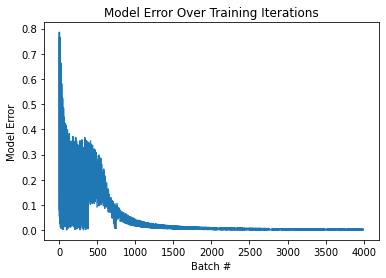

In [64]:
# setting up test/train data arrays #CLEAN UP AND CHECK FOR ACCURACY
X_train = np.array([[0, 0], [1, 0], [0, 1], [1, 1]])
Y_train = np.array([[0], [1], [1], [0]])
Y_train_2 = np.array([[0], [0], [0], [1]])
X_test = np.array([[0, 0], [0, 0], [0, 1], [0, 1], [1, 0], [1, 0], [1, 1], [1, 0], [1, 1]])
Y_test = np.array([[0], [0], [1], [1], [1], [1], [0], [1], [0]])
Y_test_2 = np.array([[0], [0], [0], [0], [0], [0], [1], [0], [1]])


# creating model object
model = Network('log-loss', X_train, Y_train, X_test, Y_test, x_features=2, epoch_num=1000,
                layer_num=2, layer_depths=[3,1], learn_rate=0.1,print_error_iteration=100)

model.add_Layer('tanhyp', 'initial_hidden')

# adding output layer
model.add_Layer('tanhyp', 'output')

# training model
model.train()

# plotting model error while training
model.plot_train_error(print_error=False)

# testing model classification abilities
model.test_classification()

#showing model prediction for a given input vector
model.predict(X_test)

In [65]:
#optimized homebrew model params
print(model)

Network trained with log-loss Cost Function. Layers: 
[Initial_Hidden Layer with 3 tanhyp Comprising Neurons. 
Neuron Weights Array: 
 [[-2.4860797  -1.86741423]
 [-1.9726238  -2.6007043 ]
 [-1.34672171  1.38450992]] 
 Next Layer in the NN is 1 Neurons Deep
 Output Layer with 1 tanhyp Comprising Neurons. 
Neuron Weights Array: 
 [[ 3.06148309 -3.1652035  -2.15172582]]]


In [66]:
from sklearn.neural_network import MLPClassifier

skl_model = MLPClassifier(hidden_layer_sizes = (3) ,activation='tanh',solver ='sgd',batch_size=1,learning_rate_init=0.1,max_iter=1000,momentum=0)
skl_model.fit(X_train,Y_train.flatten())

score = skl_model.score(X_test, Y_test.flatten())
print(f'Model Achieves an test accuracy of {score*100}%')

Model Achieves an test accuracy of 100.0%


[array([[-3.37523151, -0.78886579,  2.10008684],
       [-3.40469805,  0.15616773,  2.25586344]]), array([[-4.61270955],
       [ 1.99202443],
       [-4.52223123]])]


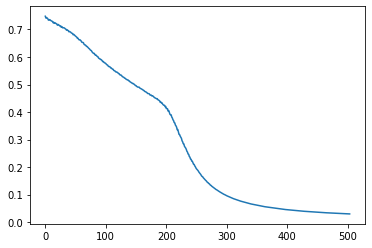

In [67]:
#printing optimal model parameters
optimized_model_params = skl_model.coefs_
print(optimized_model_params)

#showing the model loss curve


loss_curve = skl_model.loss_curve_

plt.plot(np.arange(len(loss_curve)),loss_curve)
plt.show()

In [68]:
#mking predictions using the model
skl_model.predict(X_test)

array([0, 0, 1, 1, 1, 1, 0, 1, 0])